### Abstract

This notebook is an example that shows how to build a multiclass classification model with the Keras API. 
References: 
- [Multiclass Classification with Keras](http://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/)
- [Display deep learning model training history with Keras](http://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/)

### Build Model

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

# Generate dummy data
import numpy as np
import pandas as pd
x_train = np.random.random((1000, 20))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)
x_test = np.random.random((100, 20))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)

model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(64, activation='relu', input_dim=20))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.summary()
print("stateful:", model.stateful)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                1344      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 6,154
Trainable params: 6,154
Non-trainable params: 0
_________________________________________________________________
stateful: False


### Training

In [2]:
# prevent the application from occupying all the memory in the GPU.
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
#config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth=True
session = tf.Session(config=config)
set_session(session)

In [27]:
history = model.fit(x_train, y_train, epochs=100, batch_size=128, verbose=0)

In [28]:
history.history.keys()

dict_keys(['acc', 'loss'])

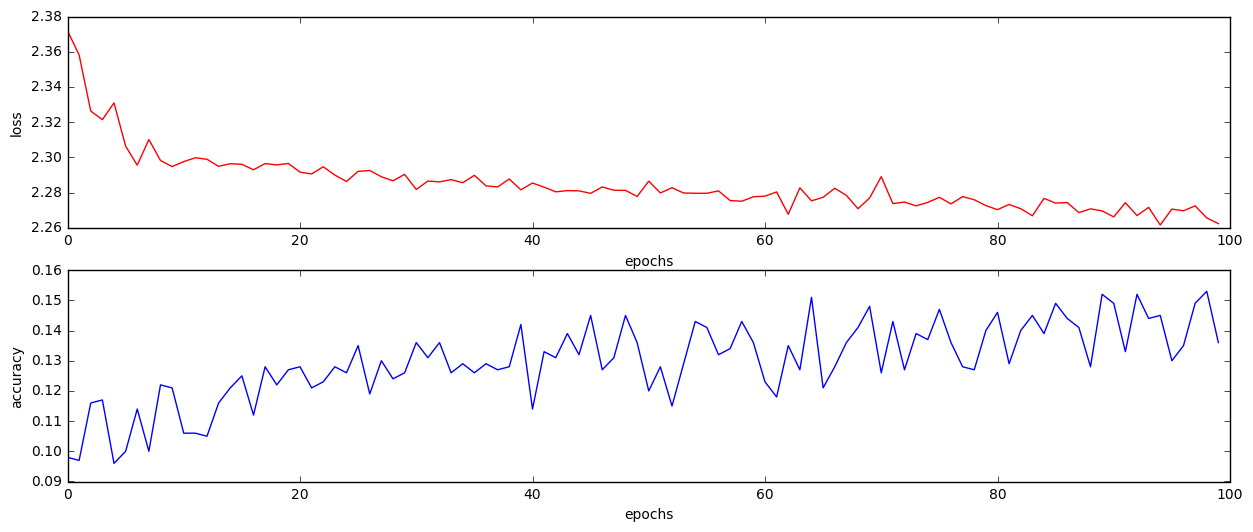

In [29]:
import matplotlib.pyplot as plt
# configure notebook to display plots
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

metrics = pd.DataFrame(history.history)

ax = plt.subplot(211)

# plot the evolution of loss and accurary during the training peroid
ax.plot(metrics['loss'], color='r')
#plt.plot(metrics['acc'])
plt.ylabel('loss')
plt.xlabel('epochs')

ax = plt.subplot(212)
ax.plot(metrics['acc'])
plt.xlabel('epochs')
_ = plt.ylabel('accuracy')

### Evaluation

In [5]:
score = model.evaluate(x_test, y_test, batch_size=128)

print(score)

100/100 [==============================] - 0s
[2.3252110481262207, 0.059999994933605194]


In [ ]:
# as long as the Notebook is alive, the application would keep occupying the GPU memory.
session.close()